In [2]:
# Biblioteca para tratamiento de datos
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Configuración para poder visualizar todas las columnas y filas de los DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Fase 1**: limpieza e imputación

In [5]:
# Función para leer csv
def ejecutar_csv(ruta_csv):
    df= pd.read_csv(ruta_csv)
   
    return df

In [6]:
# LLamo la función para leer csv e imprimir las 5 primeras filas 
df_flight = ejecutar_csv('Customer_Flight_Activity.csv')
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [7]:
df_loyalty = ejecutar_csv('Customer_Loyalty_History.csv')
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [8]:
# Imprimo la forma de mi df Flight, se observa el número de filas y columnas 
df_flight.shape

(405624, 10)

In [9]:
# Imprimo la forma de mi df Loyalty, se observa el número de filas y columnas 
df_loyalty.shape

(16737, 16)

In [10]:
# Función para uniformizar los nombres de las columnas
def renombrar_columnas_con_guion_bajo(df):
    df.columns = [col.replace(" ", "_") for col in df.columns]
    return df

In [11]:
# Llamo la función para uniformizar los nombres de las columnas y combruebo que funciona 
df_loyalty_1 = renombrar_columnas_con_guion_bajo(df_loyalty)
df_loyalty_1.head()

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [12]:
# Llamo la función para uniformizar los nombres de las columnas y combruebo que funciona 
df_flight_1 = renombrar_columnas_con_guion_bajo(df_flight)
df_flight_1.head()

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [13]:
df_flight_1.duplicated().sum()

1864

In [14]:
df_loyalty_1.duplicated().sum()

0

In [15]:
# Creo una nueva variable para la unión. 
# Utilico el merge ya que los dos archivos tienen columnas en común y para preservar todos los datos ya que los dfs tiene cantidad de datos distintos, 
# Unifico los dos DataFrames poniendo Loyalty como el primero a la izquierda y Flight como el segundo a la derecha
# Utilico la columna `Loyalty_Number`, que es la columnas que los dos DFs tienen en común para unificar.
df_customers = df_loyalty_1.merge(df_flight_1, left_on='Loyalty_Number', right_on='Loyalty_Number', how='left')

df_customers.head()

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [16]:
# Miro la forma del DF unificado 
df_customers.shape

(405624, 25)

In [17]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal_Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital_Status               405624 non-null  object 
 9   Loyalty_Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment_Type              405624 non-null  object 
 12  Enrollment_Year              405624 non-null  int64  
 13 

In [18]:
# Visualizo si mi DF tiene duplicados y opto por no quitarlos porque veo que en columna mes, existen números distintos para cada cliente
df_customers.duplicated().sum()

1864

In [19]:
# Elimino las filas duplicadas del df 
df_sin_duplicados = df_customers.drop_duplicates()
# Compruebo que no hay duplicados en el df
df_sin_duplicados.duplicated().sum()

0

In [20]:
# Imprimo la forma del df después de quitar las filas duplicadas
df_sin_duplicados.shape

(403760, 25)

In [21]:
# Imprimo el DF con 5 columnas aleatórias
df_sin_duplicados.sample(5)

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
87015,218917,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Divorced,Aurora,14635.45,Standard,2017,1,NaN,NaN,2018,5,0,0,0,0,0.0,0,0
126511,683250,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,74756.0,Married,Nova,3554.85,Standard,2014,10,2015.0,6.0,2017,8,0,0,0,0,0.0,0,0
90510,376144,Canada,Ontario,London,M5B 3E4,Female,Bachelor,103083.0,Married,Aurora,17002.02,Standard,2017,8,NaN,NaN,2017,7,0,0,0,0,0.0,0,0
294184,647005,Canada,Quebec,Montreal,H2T 2J6,Female,College,NaN,Married,Star,3123.08,Standard,2017,7,2018.0,3.0,2018,5,0,0,0,0,0.0,0,0
235403,309861,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,49930.0,Married,Nova,26413.55,Standard,2013,8,NaN,NaN,2017,11,0,0,0,0,0.0,0,0


In [22]:
# Miro como están distribuidas las columnas por tipo
df_sin_duplicados.dtypes

Loyalty_Number                   int64
Country                         object
Province                        object
City                            object
Postal_Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital_Status                  object
Loyalty_Card                    object
CLV                            float64
Enrollment_Type                 object
Enrollment_Year                  int64
Enrollment_Month                 int64
Cancellation_Year              float64
Cancellation_Month             float64
Year                             int64
Month                            int64
Flights_Booked                   int64
Flights_with_Companions          int64
Total_Flights                    int64
Distance                         int64
Points_Accumulated             float64
Points_Redeemed                  int64
Dollar_Cost_Points_Redeemed      int64
dtype: object

In [23]:
# Calculo la media, la mediana y la moda de la Columna 'Salary' para saber que es mejor imputar
media_salary = df_sin_duplicados['Salary'].mean()
mediana_salary = df_sin_duplicados['Salary'].median()
moda_salary = df_sin_duplicados['Salary'].mode()[0]

print(f'La media de la columna Salary es: {np.round(media_salary, 2)}') 
print(f'La mediana de la columna Salary es: {mediana_salary}')
print(f'La moda de la columna Salary es: {np.round(moda_salary, 2)}')

La media de la columna Salary es: 79258.58
La mediana de la columna Salary es: 73479.0
La moda de la columna Salary es: 101933.0


In [24]:
# Imprimo la cantidad de nullos de mi df 
df_sin_duplicados.isnull().sum()


Loyalty_Number                      0
Country                             0
Province                            0
City                                0
Postal_Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital_Status                      0
Loyalty_Card                        0
CLV                                 0
Enrollment_Type                     0
Enrollment_Year                     0
Enrollment_Month                    0
Cancellation_Year              354110
Cancellation_Month             354110
Year                                0
Month                               0
Flights_Booked                      0
Flights_with_Companions             0
Total_Flights                       0
Distance                            0
Points_Accumulated                  0
Points_Redeemed                     0
Dollar_Cost_Points_Redeemed         0
dtype: int64

In [25]:
# Utilizo la funcion ".abs" para que convierta el valor numérico negativo de la columna en valor absoluto.
df_sin_duplicados.loc[:, 'Salary'] = df_sin_duplicados['Salary'].abs()

In [26]:
df_sin_duplicados.head()

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [27]:
# Imputo la mediana en la columna 'Salary'
media_salary = df_sin_duplicados['Salary'].median()
df_sin_duplicados.loc[:, "Salary"] = df_sin_duplicados["Salary"].fillna(media_salary)
print(f'La mediana de la columna Salary es: {mediana_salary}')

La mediana de la columna Salary es: 73479.0


In [28]:
# Compruebo si hay algun valor nulo en mi DF
df_sin_duplicados.isnull().sum()

Loyalty_Number                      0
Country                             0
Province                            0
City                                0
Postal_Code                         0
Gender                              0
Education                           0
Salary                              0
Marital_Status                      0
Loyalty_Card                        0
CLV                                 0
Enrollment_Type                     0
Enrollment_Year                     0
Enrollment_Month                    0
Cancellation_Year              354110
Cancellation_Month             354110
Year                                0
Month                               0
Flights_Booked                      0
Flights_with_Companions             0
Total_Flights                       0
Distance                            0
Points_Accumulated                  0
Points_Redeemed                     0
Dollar_Cost_Points_Redeemed         0
dtype: int64

In [29]:
# Hago una copia del df para seguir trabajando 
df_limpio = df_sin_duplicados.copy()
df_limpio.sample(5)

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
173314,163615,Canada,Quebec,Montreal,H2Y 2W2,Female,Master,126642.0,Married,Nova,6057.07,Standard,2014,6,NaN,NaN,2017,11,0,0,0,0,0.0,0,0
243575,127725,Canada,Ontario,Toronto,P1J 8T7,Male,College,73479.0,Single,Star,2242.57,Standard,2015,4,NaN,NaN,2018,12,13,0,13,2756,275.0,0,0
235890,480858,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,56644.0,Divorced,Nova,27789.69,Standard,2012,5,NaN,NaN,2018,7,0,0,0,0,0.0,0,0
140333,100590,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,69841.0,Married,Star,34090.04,2018 Promotion,2018,3,NaN,NaN,2017,6,0,0,0,0,0.0,0,0
103499,746772,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,90200.0,Divorced,Nova,2772.44,Standard,2012,10,NaN,NaN,2017,12,0,0,0,0,0.0,0,0


In [31]:
# Elimino columnas imnecesarias con la función .drop --> Country porque son todos de Canada <--
columnas_a_eliminar= ['Country', 'Cancellation_Year','Cancellation_Month' ]
df_limpio.drop(columns=columnas_a_eliminar, axis = 1, inplace=True)
print(f"Las columnas {columnas_a_eliminar} han sido eliminadas")

Las columnas ['Country', 'Cancellation_Year', 'Cancellation_Month'] han sido eliminadas


In [32]:
# Imprimo las columnas numéricas 
columnas_numericas = df_limpio.select_dtypes(include=['number']).columns

print("Las columnas numéricas son:", columnas_numericas)

Las columnas numéricas son: Index(['Loyalty_Number', 'Salary', 'CLV', 'Enrollment_Year',
       'Enrollment_Month', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed'],
      dtype='object')


In [33]:
# Imprimo las columnas categóricas 
columnas_categoricas = df_limpio.select_dtypes(include=['object', 'category']).columns
print("Las columnas categóricas son:", columnas_categoricas)

Las columnas categóricas son: Index(['Province', 'City', 'Postal_Code', 'Gender', 'Education',
       'Marital_Status', 'Loyalty_Card', 'Enrollment_Type'],
      dtype='object')


## **Fase 2**: Visualización

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

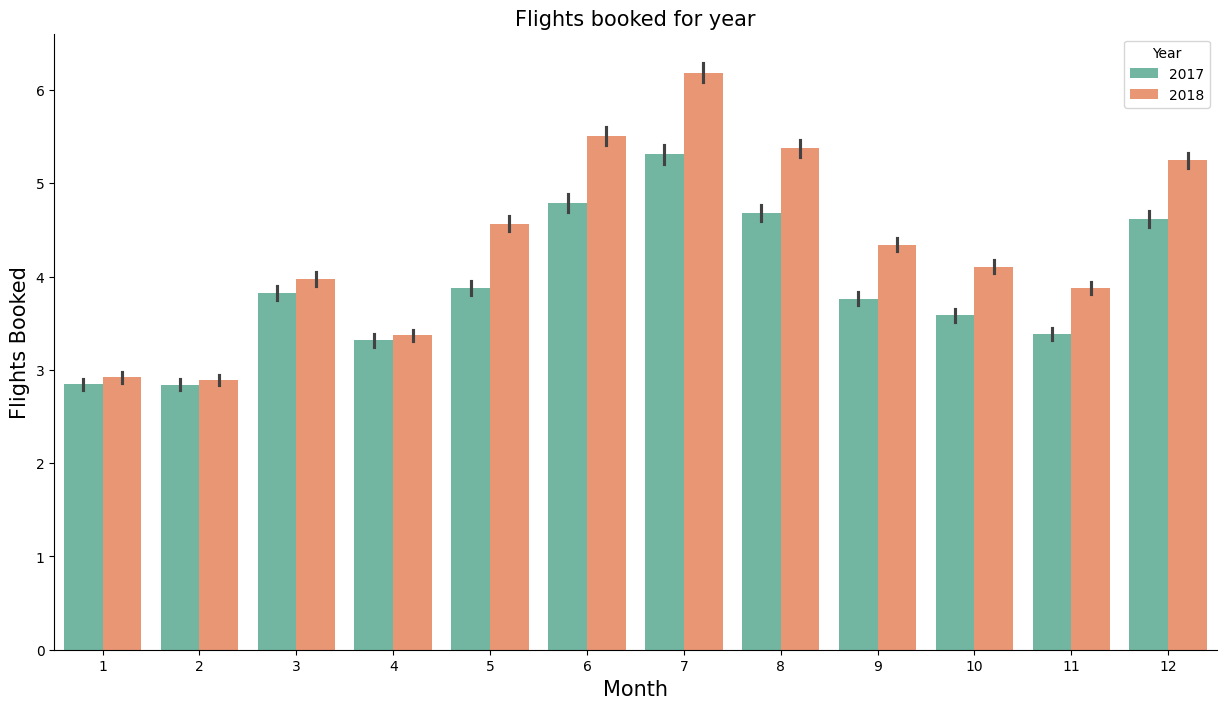

In [34]:

plt.figure(figsize=(15, 8)) #Establezco el tamaño de la figura en 15 pulgadas de ancho por 8 pulgadas de alto.
# Gráfico de barras para hacer una comparación directa entre los años, meses y reservas
sns.barplot(x='Month', y='Flights_Booked', hue= 'Year', data=df_limpio, palette='Set2')
plt.title('Flights booked for year', fontsize=15)# Establezco el título del gráfico.
plt.xlabel('Month', fontsize=15) # Establezco las etiquetas del eje x  
plt.ylabel('Flights Booked', fontsize=15) # Establezco las etiquetas del eje y
plt.legend(title= 'Year') # Establezco la leyenda por años segun los colores

# Ocultar los bordes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()


***Análisis***: 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?


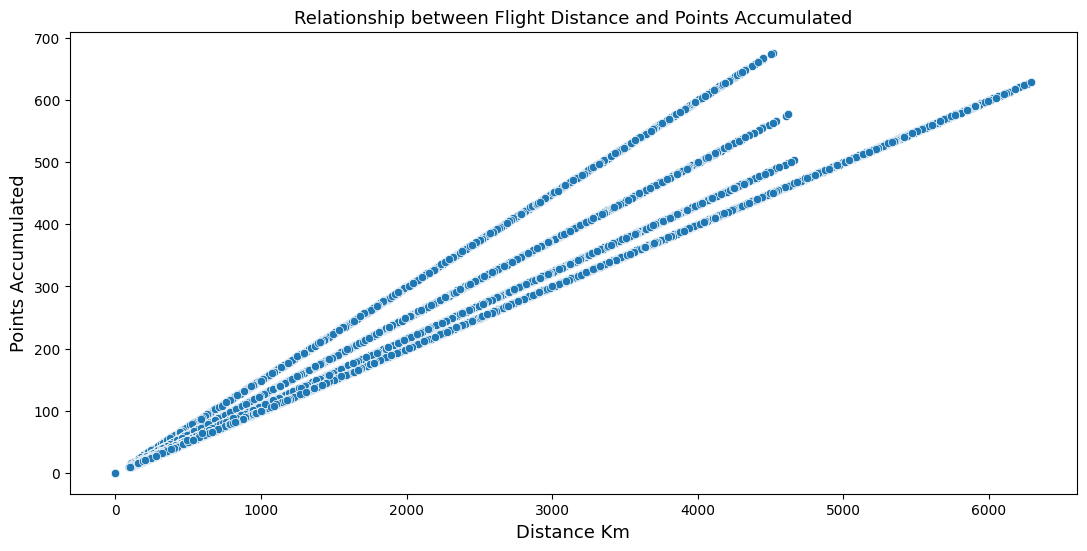

In [35]:
plt.figure(figsize=(13, 6)) #Establezco el tamaño de la figura en 13 pulgadas de ancho por 6 pulgadas de alto.

# Crear el scatter plot que facilita la visualización entre patrones y tendencias de dos variables numéricas
sns.scatterplot(x='Distance', y='Points_Accumulated', data=df_limpio)

# Añadir títulos y etiquetas
plt.title('Relationship between Flight Distance and Points Accumulated', fontsize=13)
plt.xlabel('Distance Km', fontsize=13)
plt.ylabel('Points Accumulated', fontsize=13)
plt.show()

***Análisis***: 

3. ¿Cuál es la distribución de los clientes por provincia o estado?


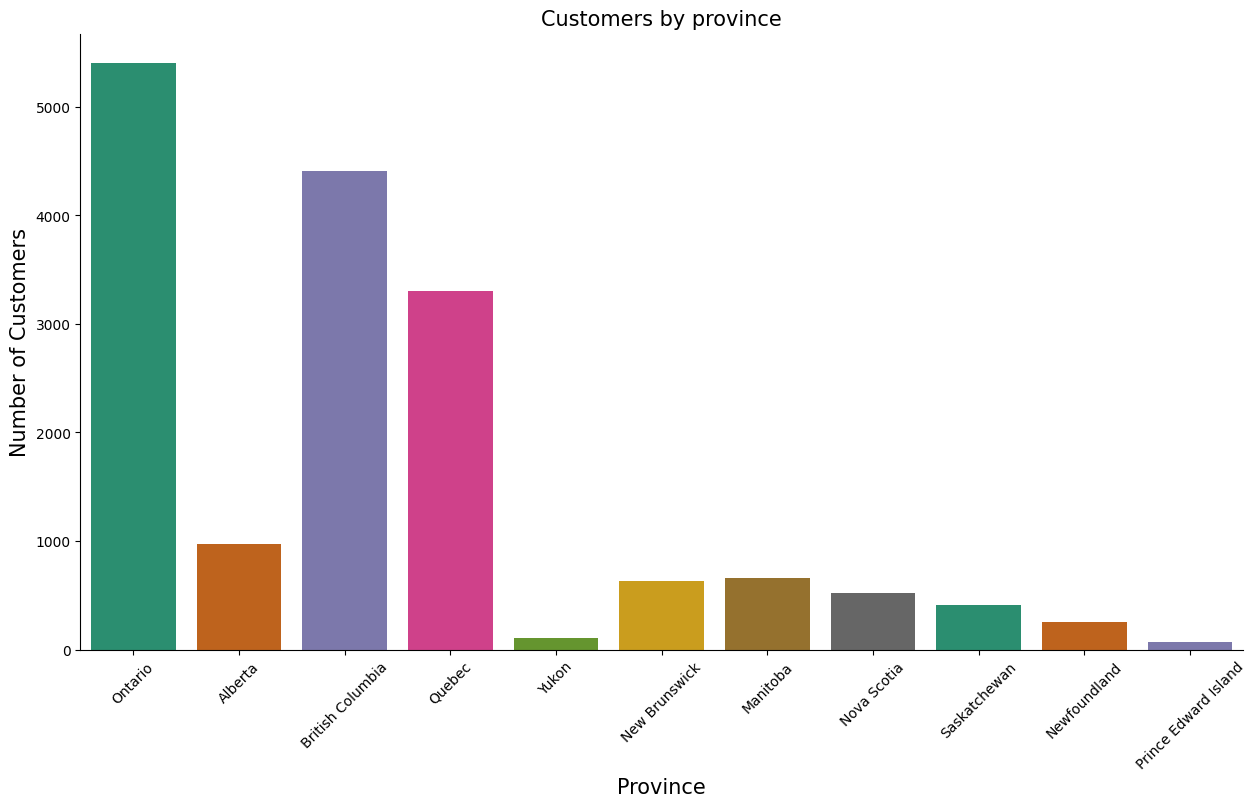

In [36]:
# Eliminar duplicados para contar cada cliente solo una vez por provincia
df_sin_duplis = df_limpio[['Loyalty_Number', 'Province']].drop_duplicates()

#Establezco el tamaño de la figura
plt.figure(figsize=(15, 8))

# Creo un count plot para visualizar el número de clientes por provincia
sns.countplot(x='Province', data=df_sin_duplis, hue='Province', palette='Dark2', dodge=False, legend=False)

# Añado títulos y etiquetas
plt.title('Customers by province', fontsize=15)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.xticks(rotation=45)

# Oculto los bordes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);


***Análisis***: 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


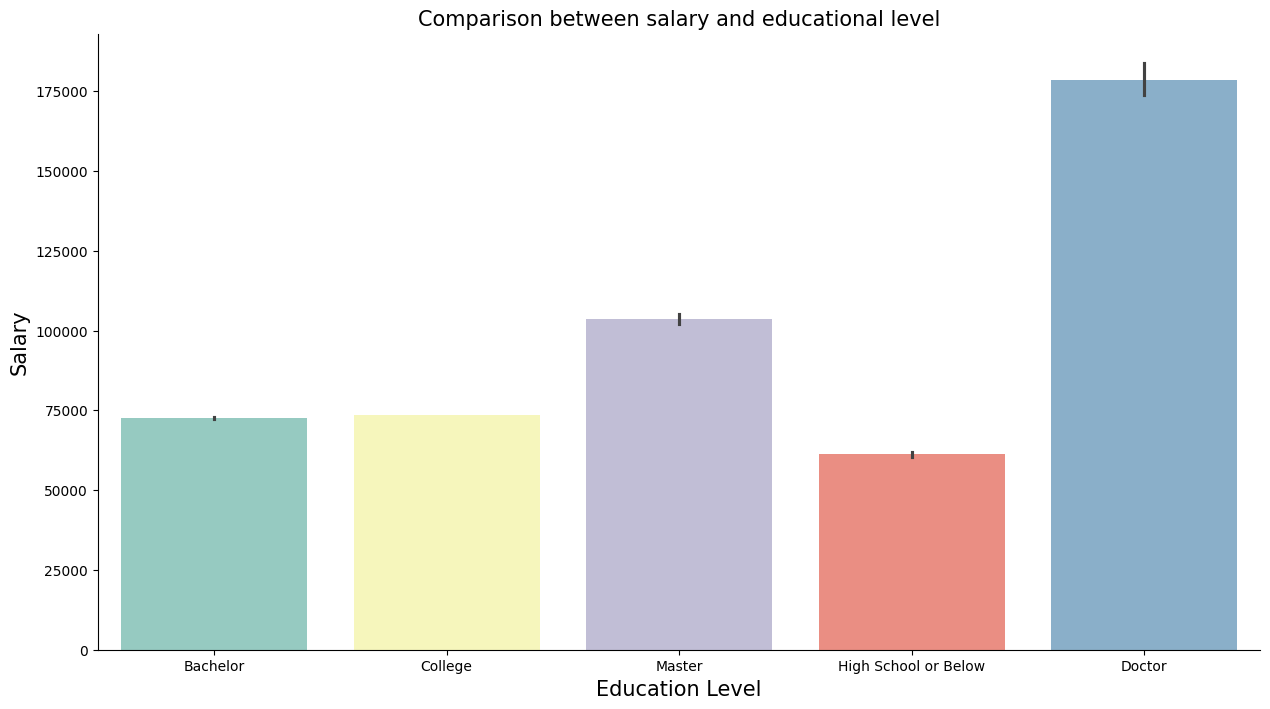

In [60]:
df_sin_duplis_2 = df_limpio[['Loyalty_Number', 'Salary', 'Education']].drop_duplicates()
plt.figure(figsize=(15, 8)) #Establezco el tamaño de la figura en 15 pulgadas de ancho por 8 pulgadas de alto.
# Gráfico de barras para hacer una comparación entre el salario medio y los niveles de educacion de los clientes
sns.barplot(x='Education', y='Salary', data=df_sin_duplis_2, palette='Set3')
plt.title('Comparison between salary and educational level', fontsize=15)# Establezco el título del gráfico.
plt.xlabel('Education Level', fontsize=15) # Establezco las etiquetas del eje x  
plt.ylabel('Salary', fontsize=15) # Establezco las etiquetas del eje y

# Ocultar los bordes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

***Análisis***: 

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [59]:
df_no_duplis = df_limpio[['Loyalty_Number', 'Loyalty_Card']].drop_duplicates()
# Verifico si los duplicados se eliminaron correctamente
print("Número de filas antes de eliminar duplicados:", len(df_limpio))
print("Número de filas después de eliminar duplicados:", len(df_no_duplis))

Número de filas antes de eliminar duplicados: 403760
Número de filas después de eliminar duplicados: 16737


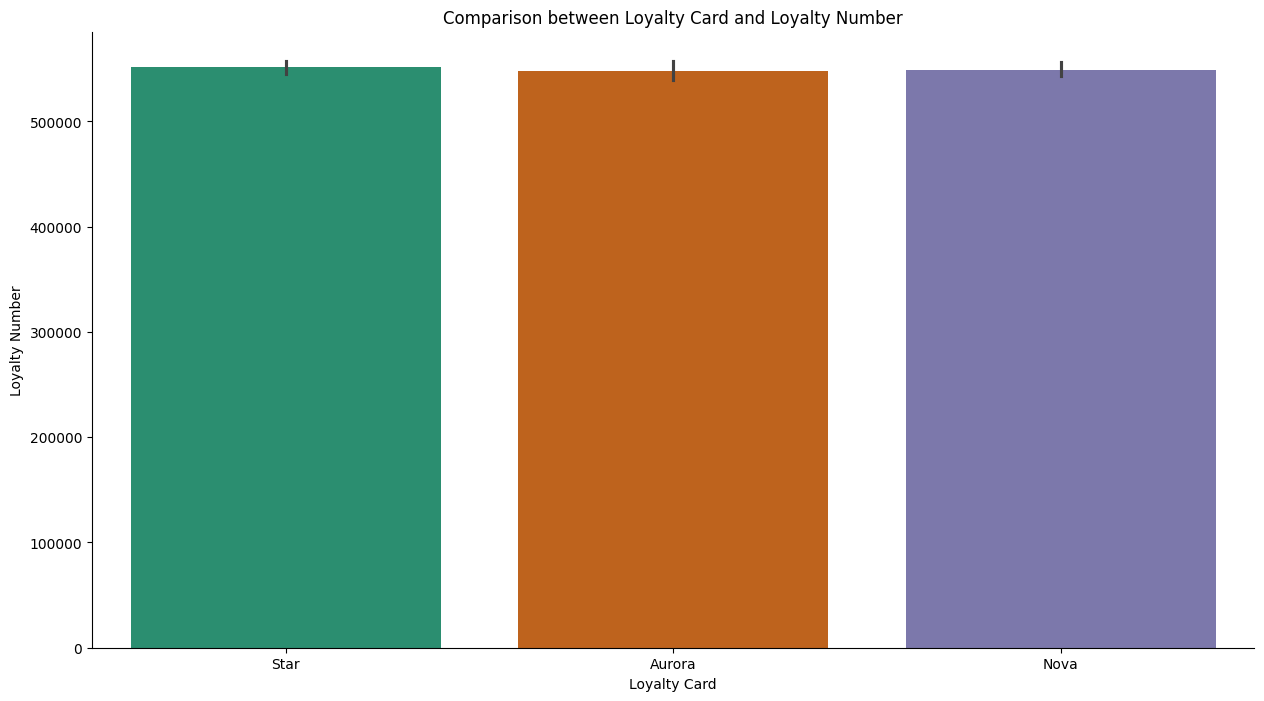

In [40]:


# Establezco el tamaño de la figura
plt.figure(figsize=(15, 8))

# Gráfico de barras para comparar Loyalty_Card y Loyalty_Number
sns.barplot(x='Loyalty_Card', y='Loyalty_Number', data=df_no_duplis, palette='Dark2')

plt.title('Comparison between Loyalty Card and Loyalty Number')
plt.xlabel('Loyalty Card')
plt.ylabel('Loyalty Number')

# Ocultar los bordes derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);


***Análisis***: 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?


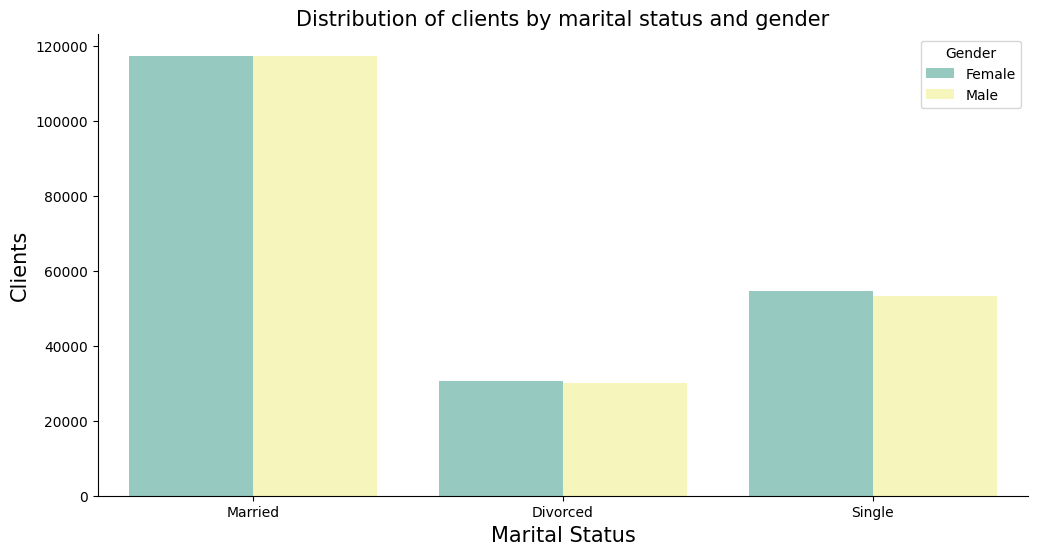

In [58]:

plt.figure(figsize=(12, 6))
# Definir el ancho de las barras

sns.countplot(x='Marital_Status', hue='Gender', data=df_limpio, palette='Set3', dodge=True)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Clients', fontsize=15)
plt.title('Distribution of clients by marital status and gender', fontsize=15)

plt.legend(title='Gender')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

***Análisis***: 


## **Fase 3**: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

- Objetivo del Ejercicio: 
    - Utilizando un conjunto de datos que hemoscompartido, se busca evaluar si existen diferencias significativas en elnúmero de vuelos reservados según el nivel educativo de los clientes.Para ello, los pasos que deberas seguir son:1. Preparación de Datos:
    - Filtra el conjunto de datos para incluir únicamente lascolumnas relevantes: 'Flights Booked' y 'Education'.2.
- Análisis Descriptivo:
    - Agrupa los datos por nivel educativo y calcula estadísticasdescriptivas básicas (como el promedio, la desviaciónestandar, los percentiles) del número de vuelos reservadospara cada grupo.3. 
- Prueba Estadística:
    - Realiza una prueba de hipótesis para determinar si existeuna diferencia significativa en el número de vuelosreservados entre los diferentes niveles educativos.

